In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import openpyxl

In [ ]:
# Leitura dos dados com pandas
df = pd.read_excel('BaseDados_RegressaoLinear.xlsx', 'Plan1')

In [56]:
df

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [59]:
# Conversão para Array 
eixo_x = df.iloc[:,0].values
eixo_y = df.iloc[:,1].values

In [60]:
eixo_x

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

In [61]:
eixo_y

array([2900.124323  , 2929.12556623, 2958.41682189, 2988.00099011,
       3017.88100001, 3048.05981001, 3078.54040811, 3109.32581219,
       3140.41907032, 3171.82326102, 3203.54149363, 3235.57690857,
       3267.93267765, 3300.61200443, 3333.61812447, 3366.95430572,
       3400.62384877, 3434.63008726, 3434.63008726, 3434.63008726,
       3434.63008726, 3574.08984167, 3609.83074009, 3645.92904749,
       3682.38833796, 3719.21222134, 3756.40434356, 3793.96838699,
       3831.90807086, 3870.22715157, 3870.22715157, 3870.22715157,
       3870.22715157, 4027.37389354, 4067.64763247, 4108.3241088 ,
       4149.40734988, 4190.90142338, 4232.81043762, 4275.13854199,
       4317.88992741, 4361.06882669, 4404.67951495, 4448.7263101 ,
       4493.2135732 , 4538.14570894, 4583.52716602, 4629.36243768,
       4675.65606206, 4722.41262268, 4769.63674891, 4817.3331164 ,
       4865.50644756, 4914.16151204, 4963.30312716, 5012.93615843,
       5063.06552001, 5113.69617521, 5164.83313697, 5216.48146

Text(0, 0.5, 'Limite')

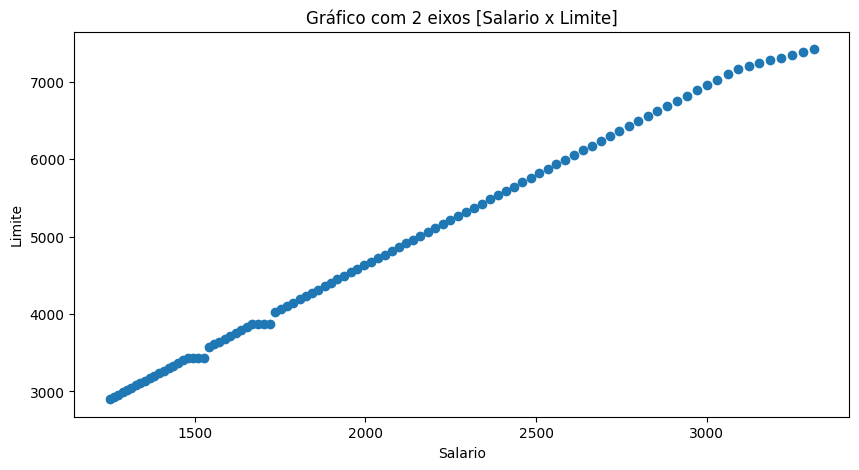

In [62]:
plt.figure(figsize = (10, 5))
plt.scatter(eixo_x, eixo_y)
plt.title('Gráfico com 2 eixos [Salario x Limite]')
plt.xlabel('Salario')
plt.ylabel('Limite')

<Axes: >

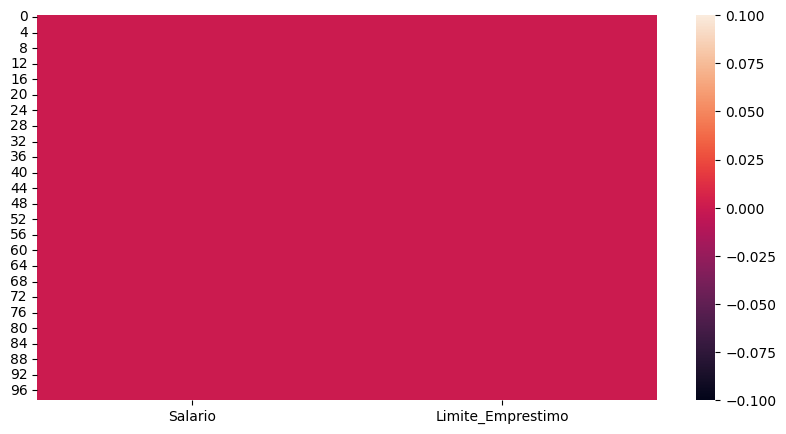

In [63]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.isnull())

In [64]:
correlacao = np.corrcoef(eixo_x, eixo_y)
correlacao

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

<Axes: >

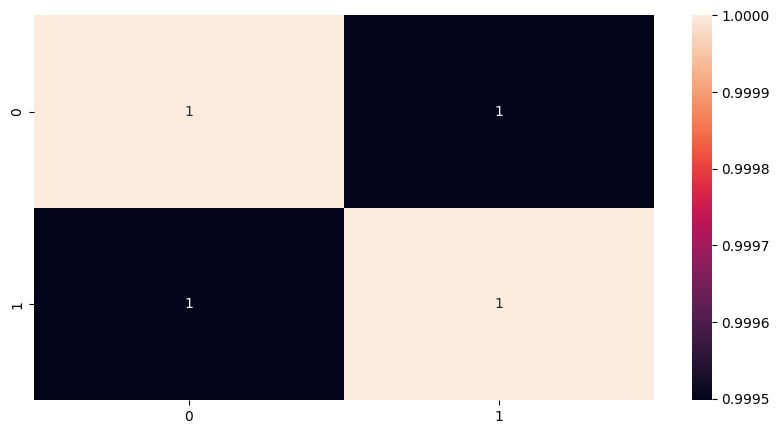

In [65]:
plt.figure(figsize = (10, 5))
sns.heatmap(correlacao, annot=True)

In [66]:
eixo_x = eixo_x.reshape(-1, 1)
eixo_y = eixo_y.reshape(-1, 1)

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    eixo_x,
    eixo_y,
    test_size = 0.20
)

In [68]:
from sklearn.linear_model import LinearRegression

funcao_regressao = LinearRegression()

funcao_regressao.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
funcao_regressao.score(x_train, y_train)

0.9989795158978068

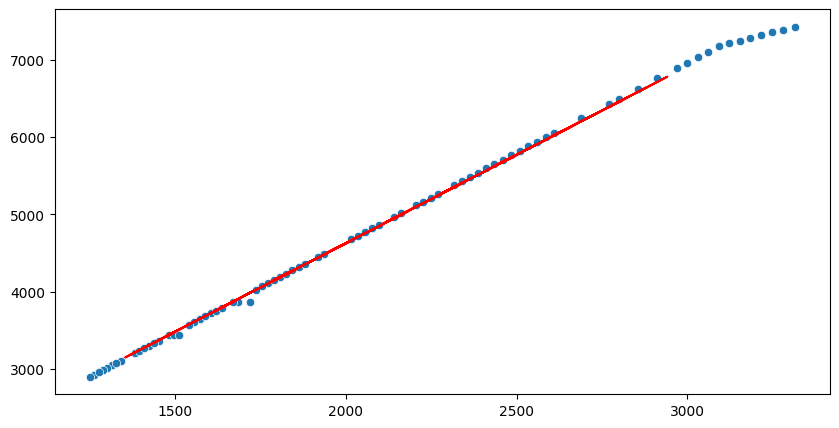

In [74]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x=x_train.ravel(), y=y_train.ravel())
plt.plot(x_test, funcao_regressao.predict(x_test), color='red')

In [ ]:
# Avalia a média de erro do modelo
previsoes = funcao_regressao.predict(x_test)
from sklearn import metrics

print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, previsoes)))

RMSE 39.23939152077577


In [ ]:
'''Dentro das chaves voce coloca o valor do Salario, e o 
modelo devolve seu limite de emprestimo (Para um salario de:
   salario = 1600 => credito_emprestimo = 3713.28)'''
print(funcao_regressao.predict( [[1600]] ))

[[3713.28180092]]
